In [1]:
import glob

import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
NAME='model-subsets'

In [4]:
results = glob.glob('../results/model-subsets*/training_history.csv')
results = [pd.read_csv(res) for res in results]
results = pd.concat(results)
results['model'] = results['dir'].str.replace('results/'+NAME+'-', '')

In [5]:
results.groupby('model').max()[['epoch', 'val_score', 'val_acc', 'val_binary_crossentropy']].sort_values('val_score')

,epoch,val_score,val_acc,val_binary_crossentropy
model,,,,
PSPNet-144x912-seresnet18-batch64-SGD-lr0.001-dice_bce_loss-classes[12]-preload,4,0.701556,0.934347,0.052665
PSPNet-144x912-seresnet18-batch64-SGD-lr0.001-dice_bce_loss-classes[034]-preload,4,0.941296,0.673336,0.016000


In [7]:
import json
distribution = glob.glob('../results/model-subsets*/test_distribution.json')
distribution = [{'dir': res, **json.load(open(res))} for res in distribution]
distribution = pd.DataFrame(distribution)
distribution['model'] = distribution['dir'].str.replace('../results/'+NAME+'-', '').str.replace('/test_distribution.json', '')

In [8]:
test_distribution = distribution[['model', 'class_1', 'class_2', 'class_3', 'class_4']].set_index('model')
max_score = results.groupby('model').max()[['epoch', 'val_score', 'val_acc', 'val_binary_crossentropy']]
test_distribution.merge(max_score, how='outer', left_index=True, right_index=True).sort_values('val_score')

,class_1,class_2,class_3,class_4,epoch,val_score,val_acc,val_binary_crossentropy
model,,,,,,,,
PSPNet-144x912-seresnet18-batch64-SGD-lr0.001-dice_bce_loss-classes[12]-preload,0,0,403,31,4,0.701556,0.934347,0.052665
PSPNet-144x912-seresnet18-batch64-SGD-lr0.001-dice_bce_loss-classes[034]-preload,0,0,439,36,4,0.941296,0.673336,0.016000


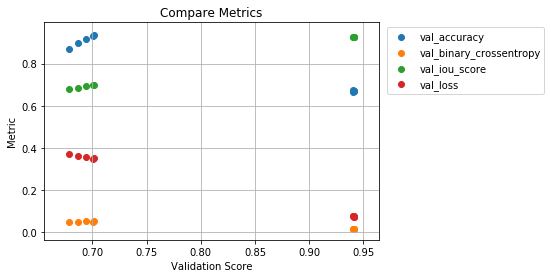

In [9]:
ax = plt.axes()
plt.scatter(x=results['val_score'], y=results['val_acc'],                 label='val_accuracy')
plt.scatter(x=results['val_score'], y=results['val_binary_crossentropy'], label='val_binary_crossentropy')
plt.scatter(x=results['val_score'], y=results['val_iou_score'],           label='val_iou_score')
plt.scatter(x=results['val_score'], y=results['val_loss'],                label='val_loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Compare Metrics')
plt.ylabel('Metric')
plt.xlabel('Validation Score')
plt.grid()

In [21]:
import os
os.chdir('/Users/perinik/github.com/NikhilPeri/steel-defect-detection')
from utils.data import clean_training_samples
samples = pd.read_csv('data/raw/train.csv')
samples = clean_training_samples(samples, 'data/raw/train_images/')
subset = samples[samples['class'].isin([1,2])]
subset.head()

,class_1_encoded_pixels,id,image_id,class_2_encoded_pixels,class_3_encoded_pixels,class_4_encoded_pixels,has_defect,class_1,class_2,class_3,class_4,class
0,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,data/raw/train_images/0002cc93b.jpg,,,,True,True,False,False,False,1
5,37607 3 37858 8 38108 14 38359 20 38610 25 388...,000a4bcdd.jpg,data/raw/train_images/000a4bcdd.jpg,,,,True,True,False,False,False,1
14,146021 3 146275 10 146529 40 146783 46 147038 ...,002fc4e19.jpg,data/raw/train_images/002fc4e19.jpg,145658 7 145901 20 146144 33 146386 47 146629 ...,,,True,True,True,False,False,1
34,356336 4 356587 11 356838 18 357089 25 357340 ...,008ef3d74.jpg,data/raw/train_images/008ef3d74.jpg,375439 5 375687 14 375935 24 376182 34 376430 ...,,,True,True,True,False,False,1
37,101742 3 101998 12 102253 19 102301 22 102509 ...,00ac8372f.jpg,data/raw/train_images/00ac8372f.jpg,98114 24 98370 72 98626 119 98881 168 99137 19...,,,True,True,True,False,False,1


In [34]:
samples['class_2_encoded_pixels'] = ''

In [35]:
samples


,class_1_encoded_pixels,id,image_id,class_2_encoded_pixels,class_3_encoded_pixels,class_4_encoded_pixels,has_defect,class_1,class_2,class_3,class_4,class
0,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,data/raw/train_images/0002cc93b.jpg,,,,True,True,False,False,False,1
1,,00031f466.jpg,data/raw/train_images/00031f466.jpg,,,,False,False,False,False,False,0
2,,000418bfc.jpg,data/raw/train_images/000418bfc.jpg,,,,False,False,False,False,False,0
3,,000789191.jpg,data/raw/train_images/000789191.jpg,,,,False,False,False,False,False,0
4,,0007a71bf.jpg,data/raw/train_images/0007a71bf.jpg,,18661 28 18863 82 19091 110 19347 110 19603 11...,,True,False,False,True,False,3
5,37607 3 37858 8 38108 14 38359 20 38610 25 388...,000a4bcdd.jpg,data/raw/train_images/000a4bcdd.jpg,,,,True,True,False,False,False,1
6,,000f6bf48.jpg,data/raw/train_images/000f6bf48.jpg,,,131973 1 132228 4 132483 6 132738 8 132993 11 ...,True,False,False,False,True,4
7,,0014fce06.jpg,data/raw/train_images/0014fce06.jpg,,229501 11 229741 33 229981 55 230221 77 230468...,,True,False,False,True,False,3
8,,001982b08.jpg,data/raw/train_images/001982b08.jpg,,,,False,False,False,False,False,0
9,,001d1b355.jpg,data/raw/train_images/001d1b355.jpg,,,,False,False,False,False,False,0


In [30]:
print('1 & 2: ' + str(len(samples[samples['class_1'] & samples['class_2']])))
print('1 & 3: ' + str(len(samples[samples['class_1'] & samples['class_3']])))
print('1 & 4: ' + str(len(samples[samples['class_1'] & samples['class_4']])))

1 & 2: 37
1 & 3: 93
1 & 4: 0


In [31]:
print('2 & 3: ' + str(len(samples[samples['class_2'] & samples['class_3']])))
print('2 & 4: ' + str(len(samples[samples['class_2'] & samples['class_4']])))

2 & 3: 16
2 & 4: 1


In [ ]:
print('2 & 3: ' + str(len(samples[samples['class_2'] & samples['class_3']])))
print('2 & 4: ' + str(len(samples[samples['class_2'] & samples['class_4']])))

Text(0, 0.5, 'dice score')

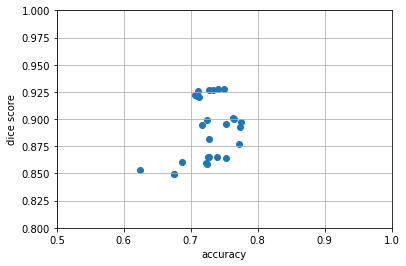

In [63]:
plt.scatter(x=results['acc'], y=results['score'])
plt.grid()
plt.xlim(0.5, 1.0)
plt.xlabel('accuracy')
plt.ylim(0.8, 1.0)
plt.ylabel('dice score')

Text(0, 0.5, 'score')

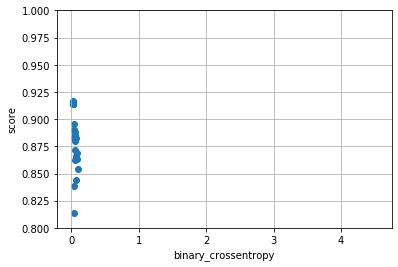

In [64]:
plt.scatter(x=results['val_binary_crossentropy'], y=results['val_score'])
plt.grid()
plt.ylim(0.8, 1.0)
plt.xlabel('binary_crossentropy')
plt.ylabel('score')

Text(0, 0.5, 'score')

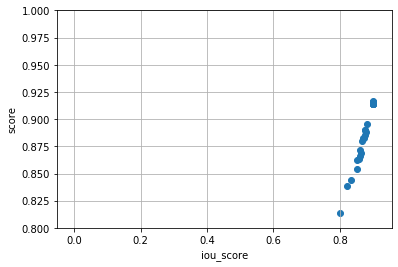

In [65]:
plt.scatter(x=results['val_iou_score'], y=results['val_score'])
plt.grid()
plt.ylim(0.8, 1.0)
plt.xlabel('iou_score')
plt.ylabel('score')

In [66]:
def plot_feature(models, feature, ylim=(0.,1.)):
    ax = plt.axes()
    for m in models:
        results[results['model'] == m][[feature]].plot(ax=ax, ylim=ylim)
    plt.legend(models, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.title('Compare ' + feature)
    plt.ylabel(feature)
    plt.xlabel('Epoch')
    plt.grid()

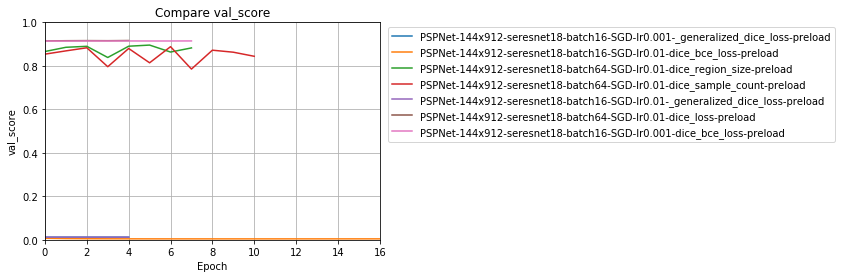

In [67]:
plot_feature(results['model'].unique(), 'val_score')

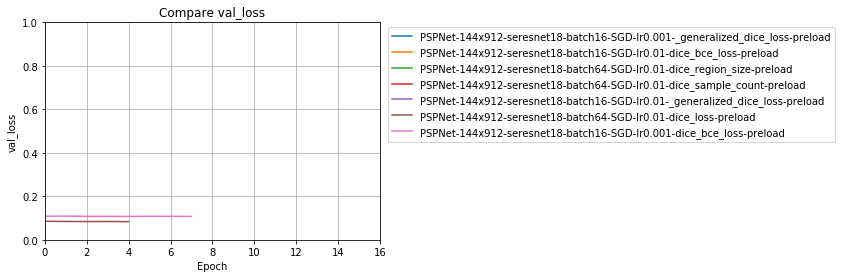

In [68]:
plot_feature(results['model'].unique(), 'val_loss')

TypeError: Empty 'DataFrame': no numeric data to plot

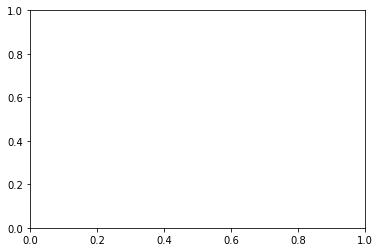

In [69]:
plot_feature([
    'PSPNet-240x1584-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-240x1584-seresnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-144x912-seresnet18-batch16-SGD-lr0.01-dice_bce_loss'
], 'loss', ylim=(0.1, 0.2))

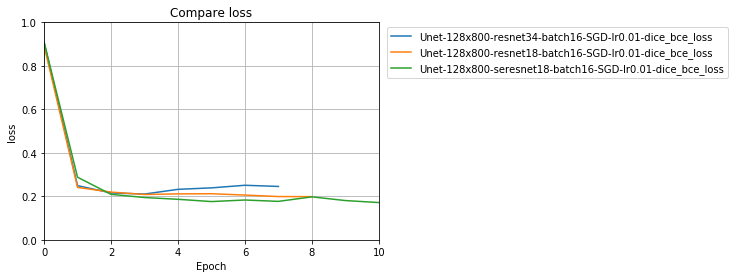

In [104]:
plot_feature([
    'Unet-128x800-resnet34-batch16-SGD-lr0.01-dice_bce_loss',
    'Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'Unet-128x800-seresnet18-batch16-SGD-lr0.01-dice_bce_loss'
], 'loss')

In [2]:
y_pred = np.ones((7, 10, 10, 4))
y_true = np.zeros((7, 10, 10, 4))

weights = K.constant(np.array([1., 1., 1., 1.]))
y_pred = K.variable(y_pred)
y_true = K.variable(y_true)

In [33]:
y_true * y_pred

<tf.Tensor: id=22, shape=(7, 10, 10, 4), dtype=float32, numpy=
array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
      